# Experiment with CDS forecast data

In [1]:
import cdsapi
client = cdsapi.Client()

In [2]:
client.retrieve(
    "s2s-forecasts",
    {
       "origin":"ecmwf",
       "variable":["2m_temperature"],
       "leadtime_hour":["024"],
       "year":["2023"],
       "month":["01"],
       "day":["30"],
    },
    "s2s_20230130.grib"
)

HTTPError: 404 Client Error: Not Found for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/s2s-forecasts
process not found
dataset s2s-forecasts not found

In [1]:
from ecmwfapi import ECMWFDataServer

server = ECMWFDataServer()

In [115]:
# param values can be 121 for max temp, or 228228 for total precip
resp = server.retrieve({
    "class": "s2",
    "dataset": "s2s",
    "date": "2015-01-01/2015-01-05/2015-01-08/2015-01-12/2015-01-15/2015-01-19/2015-01-22/2015-01-26/2015-01-29",
    "expver": "prod",
    "levtype": "sfc",
    "model": "glob",
    "origin": "ecmf",
    #"grid": "0.5/0.5", # only does interpolation if moving beyond native 1.5 resolution (native is actually much finer but downloads are limited to 1.5)
    "area": [50, 10, 40, 20],
    "param": "121",
    "step": "6/12/18/24/30/36/42/48/54/60/66/72/78/84/90/96/102/108/114/120/126/132/138/144/150/156/162/168/174/180/186/192/198/204/210/216/222/228/234/240/246/252/258/264/270/276/282/288/294/300/306/312/318/324/330/336/342/348/354/360/366/372/378/384/390/396/402/408/414/420/426/432/438/444/450/456/462/468/474/480/486/492/498/504/510/516/522/528/534/540/546/552/558/564/570/576/582/588/594/600/606/612/618/624/630/636/642/648/654/660/666/672/678/684/690/696/702/708/714/720/726/732/738/744/750/756/762/768",
    "stream": "enfo",
    "time": "00:00:00",
    "type": "cf",
    "target": "s2s-test.grib"
})
resp

2026-01-28 16:58:44 ECMWF API python library 1.6.5
2026-01-28 16:58:44 ECMWF API at https://api.ecmwf.int/v1
2026-01-28 16:58:45 Welcome Karim Bahgat
2026-01-28 16:58:46 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2026-01-28 16:58:46 ------------ WARNING ------------
2026-01-28 16:58:46 Access to this dataset is transitioning to a new interface, dates to be announced soon
2026-01-28 16:58:46 For more information on how to access this data in the future, visit https://confluence.ecmwf.int/x/-wUiEw
2026-01-28 16:58:46 ---------------------------------
2026-01-28 16:58:46 Request submitted
2026-01-28 16:58:46 Request id: 697a32371a467ec0ba8af39a
2026-01-28 16:58:46 Request is submitted
2026-01-28 16:58:48 Calling 'nice mars /tmp/20260128-1550/ec/tmp-_mars-m6uqeY-a3865ef47e2d714a45f0432635a8e117.req'
2026-01-28 16:58:48 Forcing MIR_CACHE_PATH=/data/ec_coeff
2026-01-28 16:58:48 mars - WARN -
2026-01-28 16:58:48 m

In [118]:
import xarray as xr
ds = xr.open_dataset('s2s-test-fine.grib')
ds

Ignoring index file 's2s-test-fine.grib.5b7b6.idx' older than GRIB file


<xarray.Dataset> Size: 2MB
Dimensions:            (time: 9, step: 128, latitude: 21, longitude: 21)
Coordinates:
  * time               (time) datetime64[ns] 72B 2015-01-01 ... 2015-01-29
  * step               (step) timedelta64[ns] 1kB 0 days 06:00:00 ... 32 days...
  * latitude           (latitude) float64 168B 50.0 49.5 49.0 ... 41.0 40.5 40.0
  * longitude          (longitude) float64 168B 10.0 10.5 11.0 ... 19.5 20.0
    number             int64 8B ...
    heightAboveGround  float64 8B ...
    valid_time         (time, step) datetime64[ns] 9kB ...
Data variables:
    mx2t6              (time, step, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-28T16:59 GRIB to CDM+CF via cfgrib-0.9.1...

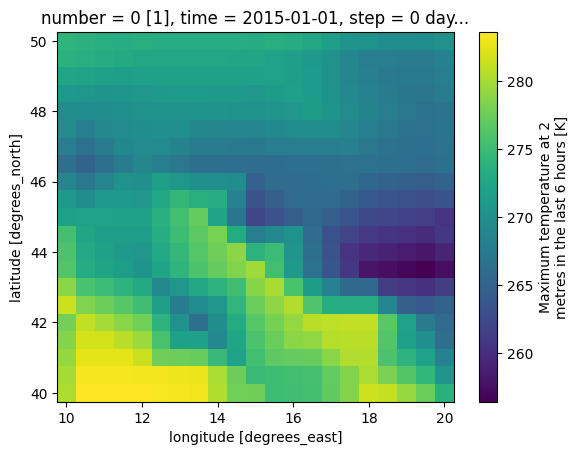

In [119]:
ds['mx2t6'].isel(time=0, step=0).plot()

## TIGGE

In [120]:
# OLD NOT USED PARAMS
params = {
    "class": "ti",
    "dataset": "tigge",
    "date": "2007-01-01/to/2007-01-31",
    "expver": "prod",
    "grid": "0.6/0.6",
    "levtype": "sfc",
    "origin": "ecmf",
    "area": [50, 10, 40, 20],
    "param": "167/228228",
    "step": "0/6/12/18/24/30/36/42/48/54/60/66/72/78/84/90/96/102/108/114/120/126/132/138/144/150/156/162/168/174/180/186/192/198/204/210/216/222/228/234/240/246/252/258/264/270/276/282/288/294/300/306/312/318/324/330/336/342/348/354/360",
    "time": "00:00:00/12:00:00",
    "type": "cf",
    "target": "tigge-test.grib",
}
params = {
    "dataset": "tigge",
    "origin": "ecmwf",
    "param": "167.128",   # 2m temperature
    "levelist": "0",
    "step": "24",
    "date": "20230101",
    "time": "00",
    "area": [50, 10, 40, 20],   # N W S E
    "param": "167/228228",
    #"grid": "0.5/0.5",        # optional, resolution
    #"format": "grib",
    "target": "tigge-test.grib"
}
params = {
    "class": "ti",
    "dataset": "tigge",
    "date": "2007-01-01/to/2007-01-31",
    "expver": "prod",
    #"grid": "0.5/0.5",
    "area": '50/10/40/20',   # N W S E
    "levtype": "sfc",
    "origin": "ecmf",
    "param": "167/228228",
    "step": "0/6/12/18/24/30/36/42/48/54/60/66/72/78/84/90/96/102/108/114/120/126/132/138/144/150/156/162/168/174/180/186/192/198/204/210/216/222/228/234/240/246/252/258/264/270/276/282/288/294/300/306/312/318/324/330/336/342/348/354/360",
    "time": "00:00:00/12:00:00",
    "type": "cf",
    "target": "tigge-test.grib"
}


# FINAL WORKING PARAMS
params = {
    "class": "ti",             # TIGGE class
    "dataset": "tigge",        # Dataset identifier
    "date": "2023-10-01",      # YYYY-MM-DD
    "expver": "prod",          # Production version
    "grid": "0.25/0.25",         # REQUIRED: Output grid resolution (lat/lon)
    "area": "50/10/40/20",  # N/W/S/E (subsetting coordinates)
    "levtype": "sfc",          # Surface level
    "origin": "ecmf",          # Forecasting center (ECMWF)
    "param": "167",            # Parameter code (e.g., 2m temperature)
    "time": "00/12",           # Forecast base times
    #"step": "24/48/72",        # Forecast steps in hours
    "step": "0/6/12/18/24/30/36/42/48/54/60/66/72/78/84/90/96/102/108/114/120/126/132/138/144/150/156/162/168/174/180/186/192/198/204/210/216/222/228/234/240/246/252/258/264/270/276/282/288/294/300/306/312/318/324/330/336/342/348/354/360",
    "type": "cf",              # Perturbed forecast (ensemble members)
    #"number": "1/2/3",         # Specific ensemble members
    "target": "tigge-test.grib"
}
resp = server.retrieve(params)
resp

2026-01-28 17:10:39 ECMWF API python library 1.6.5
2026-01-28 17:10:39 ECMWF API at https://api.ecmwf.int/v1
2026-01-28 17:10:40 Welcome Karim Bahgat
2026-01-28 17:10:41 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2026-01-28 17:10:41 ------------ WARNING ------------
2026-01-28 17:10:41 Access to this dataset is transitioning to a new interface, dates to be announced soon
2026-01-28 17:10:41 For more information on how to access this data in the future, visit https://confluence.ecmwf.int/x/-wUiEw
2026-01-28 17:10:41 ---------------------------------
2026-01-28 17:10:41 Request submitted
2026-01-28 17:10:41 Request id: 697a3502f6c7e152c762d9b9
2026-01-28 17:10:41 Request is submitted
2026-01-28 17:10:43 Calling 'nice mars /tmp/20260128-1610/9e/tmp-_mars-axWhhF-58ae87aba6c89bf1772126ec0d4fc84f.req'
2026-01-28 17:10:43 Forcing MIR_CACHE_PATH=/data/ec_coeff
2026-01-28 17:10:43 mars - WARN -
2026-01-28 17:10:43 m

In [121]:
import xarray as xr
#ds = xr.open_mfdataset(['tigge-test.grib'])
ds = xr.open_dataset(
    'tigge-test.grib',
    #filter_by_keys={'numberOfPoints': 381} # {'numberOfPoints': 152}
)
ds

Ignoring index file 'tigge-test.grib.5b7b6.idx' older than GRIB file


<xarray.Dataset> Size: 822kB
Dimensions:            (time: 2, step: 61, latitude: 41, longitude: 41)
Coordinates:
  * time               (time) datetime64[ns] 16B 2023-10-01 2023-10-01T12:00:00
  * step               (step) timedelta64[ns] 488B 0 days 00:00:00 ... 15 day...
  * latitude           (latitude) float64 328B 50.0 49.75 49.5 ... 40.25 40.0
  * longitude          (longitude) float64 328B 10.0 10.25 10.5 ... 19.75 20.0
    number             int64 8B ...
    heightAboveGround  float64 8B ...
    valid_time         (time, step) datetime64[ns] 976B ...
Data variables:
    t2m                (time, step, latitude, longitude) float32 820kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-28T17:11 GRIB to CDM+CF via cfgrib-0.9.1...

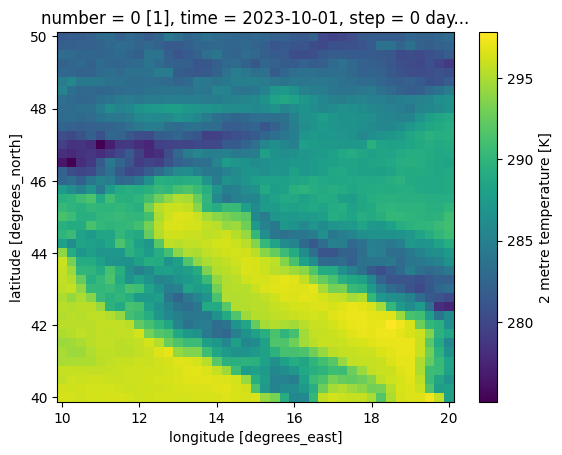

In [122]:
ds.t2m.isel(time=0, step=0).plot()

IT WORKS!!! EVERYTHING BELOW IS NOT NEEDED ANYMORE! 

------

It seems the TIGGE data gets downloaded as grib files on a gaussian grid, with longitude spacing varying by latitude. It seems we then have to convert to point cloud and interpolate. 

In [ ]:
# NEW: SEEMS WE DONT NEED THIS ANYMORE AS THE ACTUAL DOWNLOADS SUDDENLY COME AS REGULAR GRID WITH LAT LONG COORDS
# RUN THIS ONLY IF WE GET IRREGULAR GAUSSIAN GRID TO VISUALIZE THE GRID POINTS

# convert to geopandas as gpd
import geopandas as gpd
# data values has shape (time, step, flatgrid/gridpoints)
print(ds.t2m.values.shape)
print(ds.time.values.shape, ds.step.values.shape, ds.latitude.values.shape)
# subset to a single time and step
temp_subset = ds.t2m.values[0, 0, :]
print(temp_subset.shape)
# add lat,lon,subset combo to a geopandas df and show
gdf = gpd.GeoDataFrame(
    {"value": temp_subset},
    geometry=gpd.points_from_xy(ds.longitude.values, ds.latitude.values),
    crs="EPSG:4326"
)
gdf.plot()

(2, 61, 21, 21)
(2,) (61,) (21,)
(21, 21)


ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
print(ds.latitude.values.shape, ds.longitude.values.shape, ds['values'].values.shape)
lat_uniq = np.unique(ds.latitude.values)
row_lengths = [
    len(ds.latitude.values[ds.latitude.values==u])
    for u in uniq
]
print(row_lengths)
print(sum(row_lengths))

print(ds.latitude.values)
print(ds.longitude.values)

fdasf

rows = len(ds.latitude.values) / row_length
print(rows)
print(66*22)
print(18*22)

(381,) (381,) (381,)
[18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16]
381
[49.66286877 49.66286877 49.66286877 49.66286877 49.66286877 49.66286877
 49.66286877 49.66286877 49.66286877 49.66286877 49.66286877 49.66286877
 49.66286877 49.66286877 49.66286877 49.66286877 49.21343139 49.21343139
 49.21343139 49.21343139 49.21343139 49.21343139 49.21343139 49.21343139
 49.21343139 49.21343139 49.21343139 49.21343139 49.21343139 49.21343139
 49.21343139 49.21343139 49.21343139 48.763994   48.763994   48.763994
 48.763994   48.763994   48.763994   48.763994   48.763994   48.763994
 48.763994   48.763994   48.763994   48.763994   48.763994   48.763994
 48.763994   48.763994   48.3145566  48.3145566  48.3145566  48.3145566
 48.3145566  48.3145566  48.3145566  48.3145566  48.3145566  48.3145566
 48.3145566  48.3145566  48.3145566  48.3145566  48.3145566  48.3145566
 48.3145566  47.86511918 47.86511918 47.86511918 47.86511918 47.86511918
 47.86511918 47.865

NameError: name 'fdasf' is not defined

In [ ]:
import xarray as xr
import numpy as np

def open_tigge_grib_2d(grib_path, var_name=None, time_index=0, step_index=0, member_index=0):
    """
    Open a TIGGE GRIB file and reshape flattened grid values into 2D (lat, lon) xarray.

    Parameters:
    - grib_path: str, path to GRIB file
    - var_name: str, variable name to select; if None, uses first data variable
    - time_index: int, which time to select
    - step_index: int, which lead time step to select
    - member_index: int, which ensemble member to select (if present)
    
    Returns:
    - xr.DataArray with dims ('latitude','longitude') and proper coords
    """

    # Open GRIB
    ds = xr.open_dataset(
        grib_path, 
        engine="cfgrib", 
        filter_by_keys={'numberOfPoints': 381},
        backend_kwargs={'indexpath': ''},
    )

    # pick the variable
    if var_name is None:
        var_name = list(ds.data_vars)[0]
    da = ds[var_name]

    # subset time/step/member if those dims exist
    sel_kwargs = {}
    for dim, idx in [('time', time_index), ('step', step_index), ('number', member_index)]:
        if dim in da.dims:
            sel_kwargs[dim] = idx
    da = da.isel(**sel_kwargs)

    # Flattened values and coords
    values_flat = da.values          # shape: (n_points,)
    lat = ds.latitude.values         # shape: (n_points,)
    lon = ds.longitude.values        # shape: (n_points,)

    # detect unique lat/lon counts for reshaping
    lat_unique = np.unique(lat)
    lon_unique = np.unique(lon)
    nlat = lat_unique.size
    nlon = lon_unique.size
    print('shape', nlat, nlon)

    # reshape assuming row-major order (lat varies slowest)
    da_2d = xr.DataArray(
        values_flat.reshape((nlat, nlon)),
        dims=("latitude", "longitude"),
        coords={"latitude": lat_unique, "longitude": lon_unique},
        attrs=da.attrs,
    )

    # copy any other metadata from original dataset if needed
    da_2d.attrs.update({k: v for k, v in ds.attrs.items()})

    return da_2d

ds = open_tigge_grib_2d('tigge-test.grib', var_name="t2m")
ds

shape 22 60


ValueError: cannot reshape array of size 381 into shape (22,60)

In [ ]:
# OLD...
import numpy as np

# determine 2D grid shape
# TIGGE is typically a regular reduced Gaussian grid; let's say you know nlat, nlon
lat = ds.latitude.values  # shape: (n_points,)
lon = ds.longitude.values # shape: (n_points,)
values = ds.t2m.values
nlat = np.unique(lat).size
nlon = np.unique(lon).size

# reshape
values_2d = values.reshape((nlat, nlon))
lat_2d = lat.reshape((nlat, nlon))
lon_2d = lon.reshape((nlat, nlon))

# convert to xarray.DataArray
da = xr.DataArray(
    values_2d,
    dims=("latitude", "longitude"),
    coords={"latitude": lat_2d[:,0], "longitude": lon_2d[0,:]}
)
da

ValueError: cannot reshape array of size 968502 into shape (22,60)

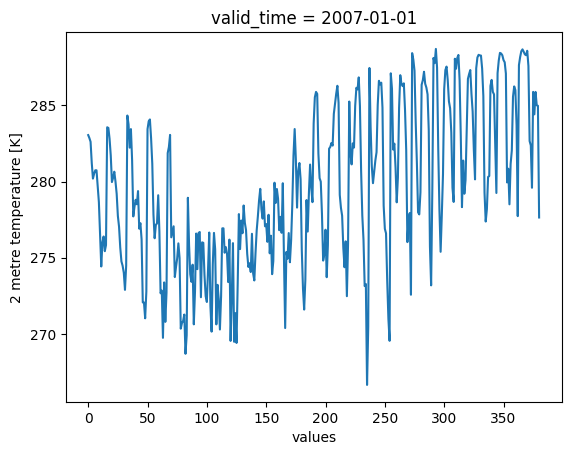

In [ ]:
temp.drop_vars(['number', 'time', 'step', 'heightAboveGround', 'surface']).isel(time=0, step=0).plot()

## TIGGE (doesnt work)

In [17]:
import cdsapi

# Initialize the CDS API client
client = cdsapi.Client()

In [ ]:
# Example parameters
dataset = "tigge"  # TIGGE dataset
model = "ecmwf"    # ECMWF ensemble (other centers also available)
variable = ["2m_temperature"]  # Example variable
start_date = "2023-01-01"
end_date = "2023-01-01"
leadtime_hours = ["024"]  # 24-hour lead forecast
bbox = [50.0, 2.0, 52.0, 5.0]  # [north, west, south, east] in degrees

# Construct the retrieval request
request = {
    "origin": model,
    "variable": variable,
    "date": start_date,
    "time": ["00"],         # forecast initialization time (UTC)
    "step": leadtime_hours, # forecast lead time
    "level": "sfc",         # surface level
    "format": "grib",       # GRIB format
    #"grid": [0.5, 0.5],     # native ~0.5° resolution
    "area": bbox,           # bounding box
    "type": "cf",           # ensemble forecast member, or "cf" for control forecast
    "target": "tigge_24h.grib"  # output file
}

# Submit request
client.retrieve(dataset, request)

HTTPError: 404 Client Error: Not Found for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/tigge
process not found
dataset tigge not found